In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
!pip install pandas numpy matplotlib seaborn plotly


In [26]:
# Import libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load dataset
data = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

# Check data structure and types
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e

In [32]:
import pandas as pd

# Load the dataset
data_path = '/kaggle/input/corona-virus-report/worldometer_data.csv'
df = pd.read_csv(data_path)

# Display the first few rows to check the existing columns
print(df.head())

# Rename columns based on the actual number of columns (16 in your case)
df.columns = ['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 
              'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 
              'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']

# Now, display the DataFrame information to confirm the columns are renamed
print(df.head())
print(df.info())


  Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1   

In [33]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values (customize as per your findings)
data.fillna(0, inplace=True)

# Remove duplicate rows if any
data.drop_duplicates(inplace=True)


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [34]:
# Total cases, deaths, and recovered cases worldwide
total_cases = data['Confirmed'].sum()
total_deaths = data['Deaths'].sum()
total_recovered = data['Recovered'].sum()
print(f"Total Cases: {total_cases}, Total Deaths: {total_deaths}, Total Recovered: {total_recovered}")


Total Cases: 828508482, Total Deaths: 43384903, Total Recovered: 388408229


Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64


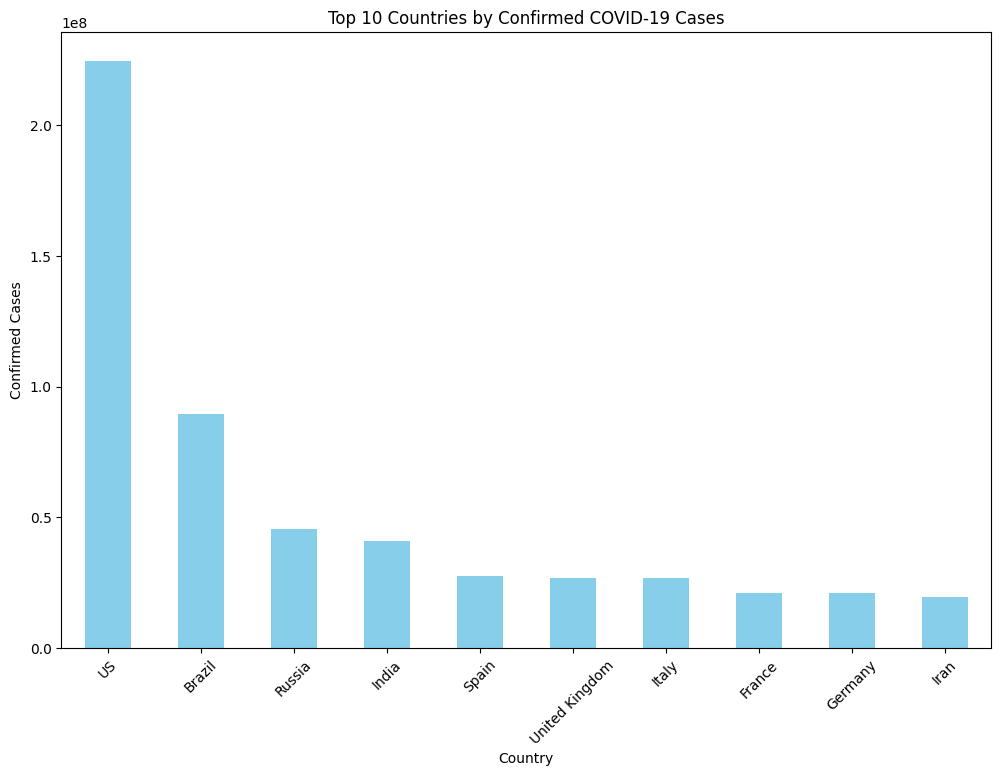

In [35]:
# Top 10 countries with highest confirmed cases
top_countries = data.groupby('Country/Region')['Confirmed'].sum().nlargest(10)
print(top_countries)

# Plot top 10 countries
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


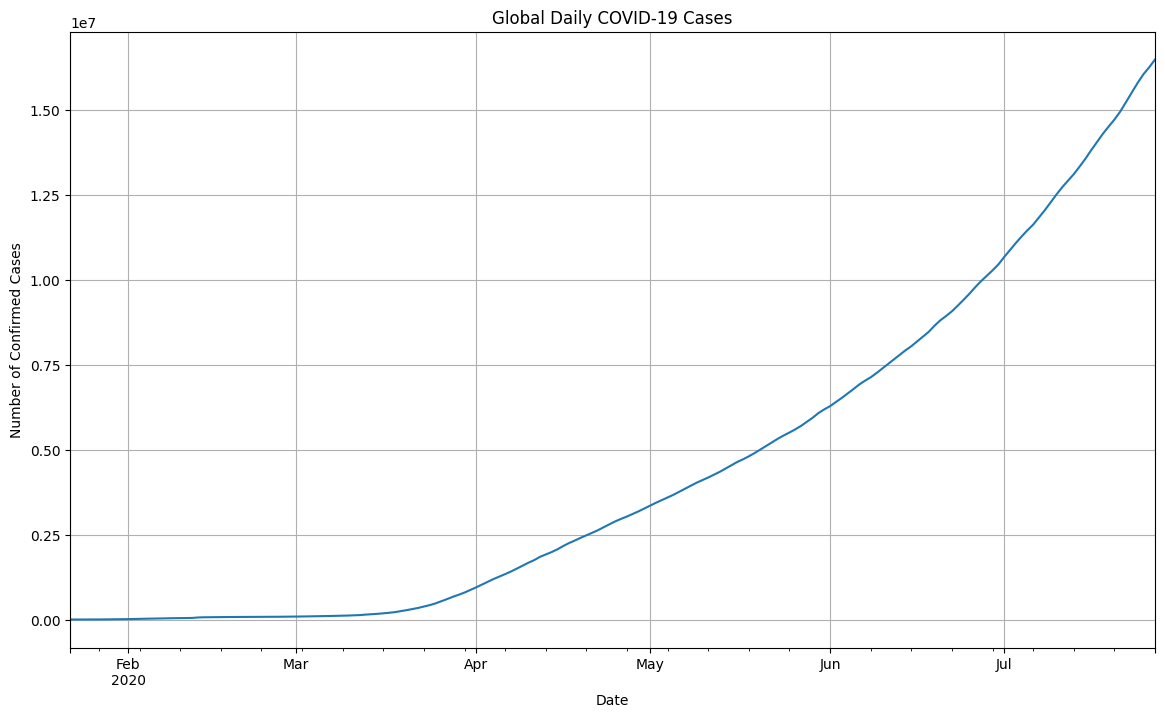

In [36]:
# Convert date column to datetime format if present
data['Date'] = pd.to_datetime(data['Date'])

# Group by date for time series analysis
daily_cases = data.groupby('Date')['Confirmed'].sum()

# Plot daily cases over time
plt.figure(figsize=(14, 8))
daily_cases.plot()
plt.title('Global Daily COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.grid()
plt.show()


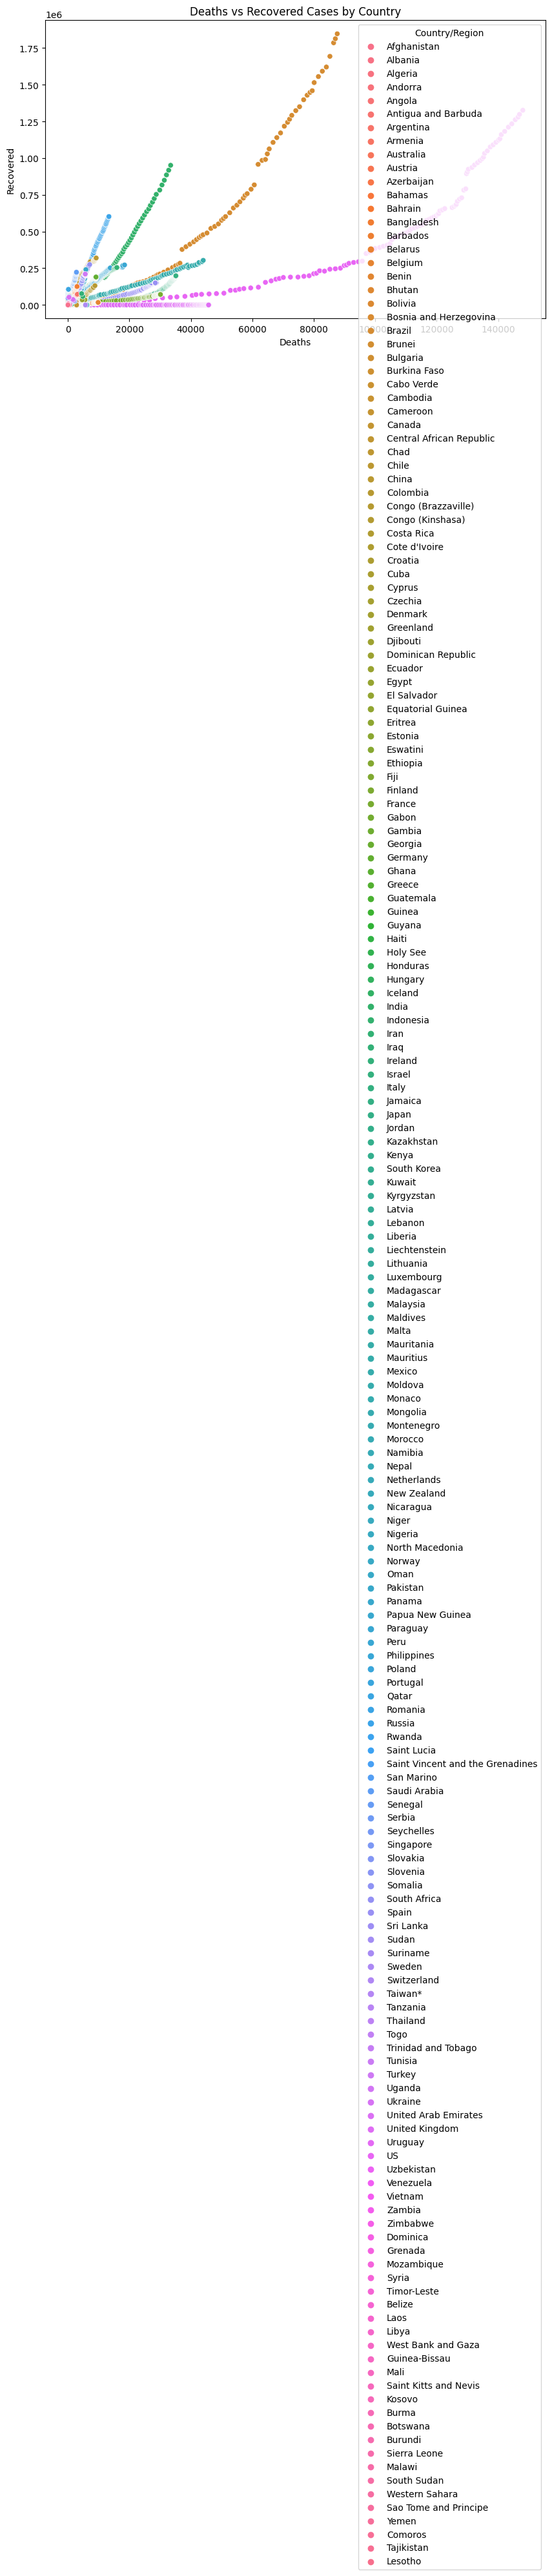

In [37]:
# Scatter plot for deaths vs recovered cases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Deaths', y='Recovered', data=data, hue='Country/Region')
plt.title('Deaths vs Recovered Cases by Country')
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.show()


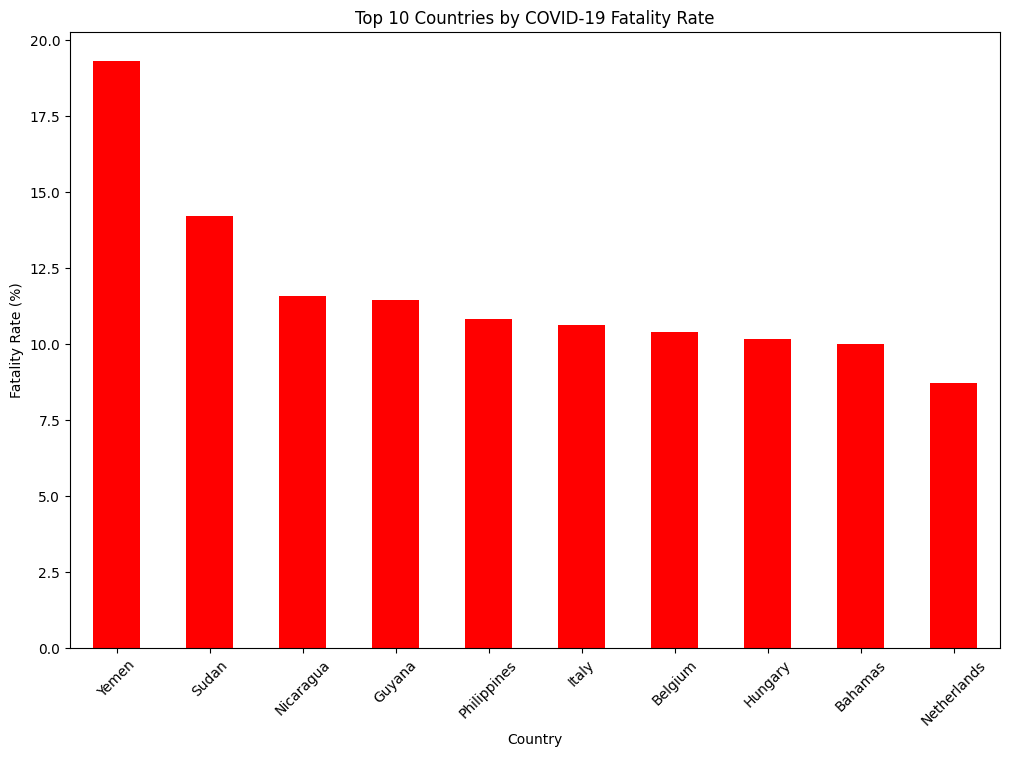

In [38]:
# Calculate case fatality rate
data['Fatality_Rate'] = (data['Deaths'] / data['Confirmed']) * 100

# Plot top 10 countries by fatality rate
top_fatalities = data.groupby('Country/Region')['Fatality_Rate'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
top_fatalities.plot(kind='bar', color='red')
plt.title('Top 10 Countries by COVID-19 Fatality Rate')
plt.xlabel('Country')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [39]:
!pip install prophet

11:46:34 - cmdstanpy - INFO - Chain [1] start processing
11:46:34 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


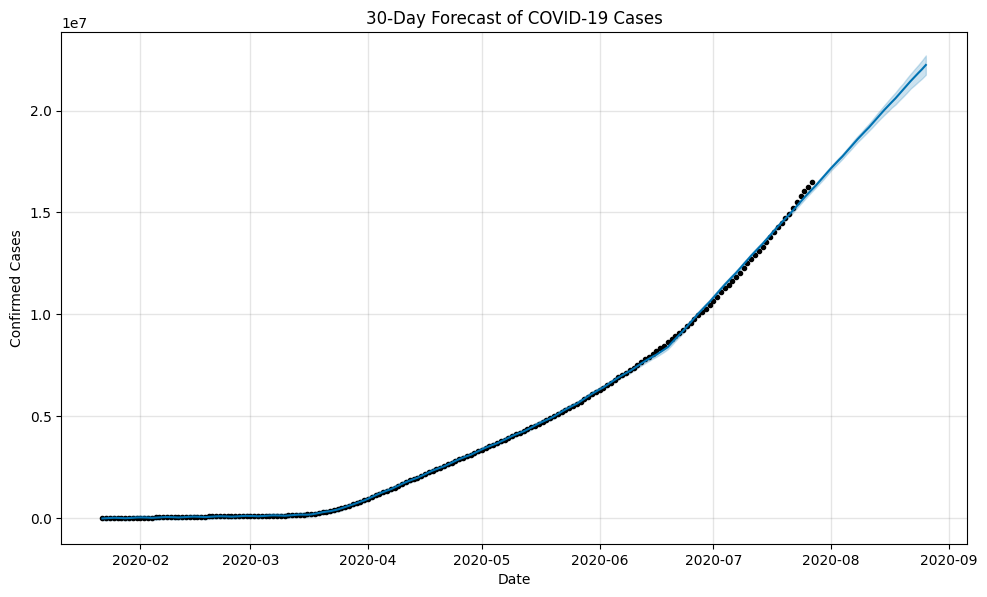

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


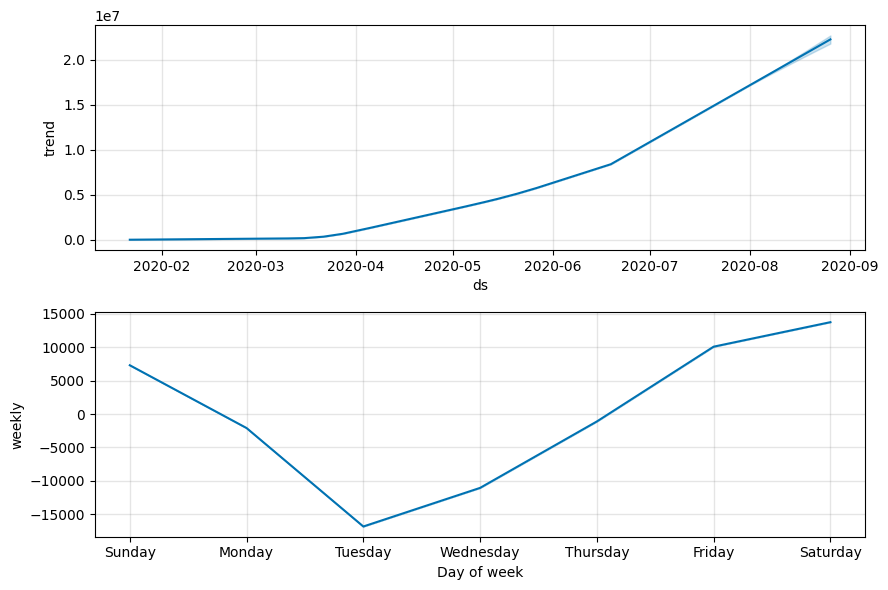

In [40]:
from prophet import Prophet
import pandas as pd

# Aggregate daily global confirmed cases
daily_cases = data.groupby('Date')['Confirmed'].sum().reset_index()
daily_cases.columns = ['ds', 'y']  # Rename columns for Prophet

# Initialize the Prophet model
model = Prophet()
model.fit(daily_cases)

# Forecast for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
plt.title('30-Day Forecast of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Plot forecast components to understand trends and seasonality
fig2 = model.plot_components(forecast)
plt.show()


In [42]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecasted_cases.csv', index=False)
